# Exercise 2- Logistic Regression

### Scenario: Admission into a university.
Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results  on  two  exams.   You  have  historical  data  from  previous  applicants that you can use as a training set for logistic regression.  

For each training example, you have the applicant’s scores on two exams and the admissions decision.

Here, we will build a classification model that estimates an applicant’s probability of admission based the scores from those two exams.


In [1]:
#Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#This is a magic command. It will display the plotting image directly below the code cell
%matplotlib inline  

In [2]:
dataFilePath = os.getcwd() + '/Data/ex2data1.txt'
data = pd.read_csv(dataFilePath, names = ['Exam1','Exam2', 'Admission'])

data.head() #by default displays first 5 rows. head(n) displays first 'n' rows

,Exam1,Exam2,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
positive = data[data['Admission'].isin([1])]
negative = data[data['Admission'].isin([0])]
print(positive.head())
print('******************************************************')
print(negative.head())

       Exam1      Exam2  Admission
3  60.182599  86.308552          1
4  79.032736  75.344376          1
6  61.106665  96.511426          1
7  75.024746  46.554014          1
8  76.098787  87.420570          1
******************************************************
        Exam1      Exam2  Admission
0   34.623660  78.024693          0
1   30.286711  43.894998          0
2   35.847409  72.902198          0
5   45.083277  56.316372          0
10  95.861555  38.225278          0


**It is often useful to understand the data by visualizing it.**

Text(0.5,1,'Scatter plot of training data')

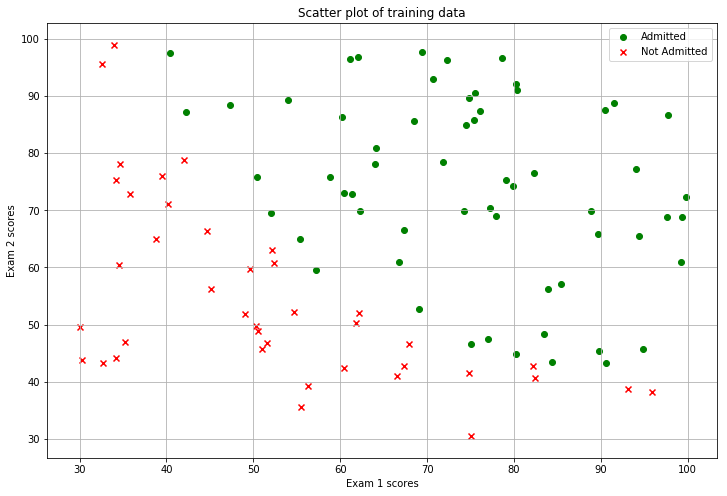

In [4]:
figure,axes = plt.subplots(figsize= (12, 8))  
axes.scatter(positive['Exam1'], positive['Exam2'],c = 'g', marker= 'o', label = 'Admitted')
axes.scatter(negative['Exam1'], negative['Exam2'],c = 'r', marker= 'x', label = 'Not Admitted')
axes.grid(True) #Displays the grid format in the plot
axes.legend() #Displays the legend

axes.set_xlabel('Exam 1 scores') 
axes.set_ylabel('Exam 2 scores')
axes.set_title('Scatter plot of training data')

## Cost Function
### <center> $ J(\Theta ) = \frac{1}{m} \sum_{i= 1}^{m}\left [-y ^{(i)} log(h_{\Theta}(x^{(i)}))- (1 - y ^{(i)}) log(1 - h_{\Theta}(x^{(i)})) \right ] $
### <center> <small> where, $ h_{\Theta}(X) = g(\Theta^{T}X)$ 
### <center> <small> where, $ g(z) = \frac{1}{1 + e^{-z}}$  (is a sigmoid function)

In [5]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

In [6]:
def hypothesis(theta, X):
    theta = np.matrix(theta)
    
    z = X * theta.T
    h = sigmoid(z)
    
    return h

In [7]:
def costFunction(theta, X, y):
    
    # **************Initialization**************    
    m = X.shape[0]
    J = 0    
    
    # ***************Hypothesis*****************    
    h_theta_x = hypothesis(theta, X)
    
    # *************Cost Function****************
    
            # np.multiply for elementwise matrix multiplication
    J = J + np.sum(np.multiply(-y, np.log(h_theta_x)) - np.multiply((1 - y),np.log(1 - h_theta_x)))      
    J = (1/m) * J
                           
    return J

**We add a column of ones to the training data so that we can use a Vectorized solution in computing Cost Function and Gradient.**



In [8]:
data.insert(0, 'Ones',1)
cols = data.shape[1]

X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]
print(X.head())
print('******************************************************')
print(y.head())

   Ones      Exam1      Exam2
0     1  34.623660  78.024693
1     1  30.286711  43.894998
2     1  35.847409  72.902198
3     1  60.182599  86.308552
4     1  79.032736  75.344376
******************************************************
   Admission
0          0
1          0
2          0
3          1
4          1


In [9]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.array([0,0,0])

In [10]:
X.shape, y.shape, theta.shape

((100, 3), (100, 1), (3,))

## Gradient 

### <center> $\frac{\partial J(\Theta)}{\partial \Theta_{j}} =  \frac{1}{m}\sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_{j}^{(i)}$

In [11]:
def gradientFunction(theta, X, y):
       
    # **************Initialization**************    
    m = X.shape[0]
    grad = np.matrix(np.zeros(theta.shape))
    
    # ***************Hypothesis*****************    
    h_theta_x = hypothesis(theta, X)   
    
    # *************Gradient********************
    error = h_theta_x - y;
    grad = (1/m) * np.sum(np.multiply(error, X), axis = 0) # axis= 0 implies operations on columns
                       
    return grad

In [12]:
gradientFunction(theta, X, y)

matrix([[ -0.1       , -12.00921659, -11.26284221]])

In [13]:
import scipy.optimize as opt

#      x - optimized theta values
# nfeval - number of function evaluations
#     rc - return code

x, nfeval, rc = opt.fmin_tnc(func=costFunction, x0=theta, fprime=gradientFunction, args=(X, y))
trained_theta = x
trained_theta

array([-25.16131855,   0.20623159,   0.20147149])

In [14]:
initial_cost = costFunction(theta, X, y)
print('  Cost: with initial theta values = ', initial_cost)
minimised_cost = costFunction(trained_theta, X, y)
print('Cost: with optimized theta values = ', minimised_cost)

  Cost: with initial theta values =  0.6931471805599453
Cost: with optimized theta values =  0.20349770158947486


In [15]:
def predict(theta, X):
    # **************Initialization**************
    m = X.shape[0]
    prediction = np.zeros(y.shape)
    
    # ****************Hypothesis****************
    h_theta_x = hypothesis(theta, X)
    
    # ****************Prediction****************
    for i in range(m):
        if h_theta_x[i] < 0.5:
            prediction[i] = 0
        else:
            prediction[i] = 1
    
    return prediction

In [16]:
print('Prediction the admission probability for  a  student  with  an Exam  1  score of  45  and  an  Exam  2  score  of  85')
examScores = np.matrix([1, 45, 85])
our_prediction = hypothesis(trained_theta, examScores)
print('Admission Probability = ', our_prediction[0,0])


Prediction the admission probability for  a  student  with  an Exam  1  score of  45  and  an  Exam  2  score  of  85
Admission Probability =  0.7762906222668583


### Plot Decision Boundary

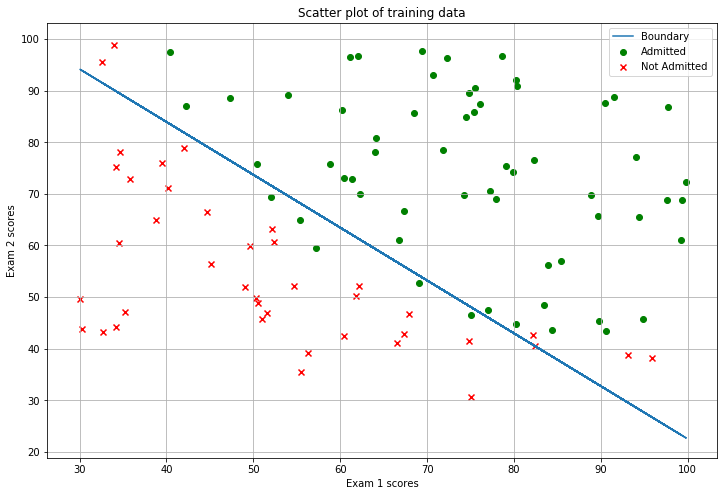

In [17]:
figure,axes = plt.subplots(figsize= (12, 8))  
axes.scatter(positive['Exam1'], positive['Exam2'],c = 'g', marker= 'o', label = 'Admitted')
axes.scatter(negative['Exam1'], negative['Exam2'],c = 'r', marker= 'x', label = 'Not Admitted')
axes.grid(True) #Displays the grid format in the plot

axes.set_xlabel('Exam 1 scores') 
axes.set_ylabel('Exam 2 scores')
axes.set_title('Scatter plot of training data')

#****************Plot Decision Boundary *********************
X_data = np.array(X[:,1:2]).ravel()

plot_x = X_data
plot_y = np.multiply((-1./trained_theta[2]),(np.multiply(trained_theta[1],plot_x) + trained_theta[0]))

axes.plot(plot_x, plot_y, label = 'Boundary')

axes.legend() #Displays the legend

## Logistic Regression using Scikit- learn

In [18]:
from sklearn import linear_model

regr = linear_model.LogisticRegression()
y = np.array(y).ravel() 
regr.fit(X[:,1:2], y)  # Train the model using the training sets

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
y_pred = predict(trained_theta, X)
sci_pred = regr.predict(X[:,1:2])

In [20]:
accuracy = np.mean(np.double(y_pred == y)) * 100
print('  Our model : Accuracy = {0} %'.format(accuracy))
sci_accuracy = np.mean(np.double(sci_pred == y)) * 100
print('scikit-learn :Accuracy = {0} %'.format(sci_accuracy))

  Our model : Accuracy = 89.0 %
scikit-learn :Accuracy = 80.0 %
